# Logistic Regression Implementation

### PreProcess Data

In [40]:
import PreProcessData as pre
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
imp.reload(pre)
X_train, X_valid, y_train, y_valid = pre.PreProcessData()
y_valid = [0 if int(y) == 2 or int(y) == 3 else y for y in y_valid]
y_valid = np.array(y_valid)
y_valid = y_valid.reshape(-1,1)

### Class Construction

In [87]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize parameters
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted -y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X, threshold=0.5):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted_per = self.sigmoid(linear_model)
        y_predicted_bool = [1 if i > threshold else 0 for i in y_predicted_per]
        return y_predicted_per, y_predicted_bool

    def validate(self, y_pred, y_valid):
        num_of_correct_predictions = 0
        for i in range(len(y_valid)):
            if y_pred[i] == y_valid[i]:
                num_of_correct_predictions += 1
        accuracy = num_of_correct_predictions / len(y_valid)
        return accuracy

    def precision(self, y_pred, y_valid):
        num_of_correct_positives = 0
        num_of_positives = 0
        for i in range(len(y_valid)):
            if y_pred[i] == y_valid[i] and y_valid[i]:
                num_of_correct_positives += 1
            if y_pred[i]:
                num_of_positives += 1
        accuracy = num_of_correct_positives / num_of_positives
        return accuracy

    def recall(self, y_pred, y_valid):
        TP_and_FN = 0
        TP = 0
        for i in range(len(y_valid)):
            if y_pred[i] == y_valid[i] and y_valid[i]:
                TP += 1
            if (y_valid[i] and y_pred[i] == y_valid[i]) or (not y_pred[i] and y_pred[i] != y_valid[i]):
                TP_and_FN += 1
        accuracy = TP / TP_and_FN 
        return accuracy

    def specificity(self, y_pred, y_valid):
        TN_and_FP = 0
        TN = 0
        for i in range(len(y_valid)):
            if y_pred[i] == y_valid[i] and not y_valid[i]:
                TN += 1
            if (not y_valid[i] and y_pred[i] == y_valid[i]) or (y_pred[i] and y_pred[i] != y_valid[i]):
                TN_and_FP += 1
        accuracy = TN / TN_and_FP 
        return accuracy

    def plot(self, y_pred, y_valid):
        y_pred = [0 if y < 0.5 else 1 for y in y_pred]
        # Calculate confusion matrix
        cm = confusion_matrix(y_valid, y_pred)

        # Define labels for the confusion matrix
        labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

        # Annotate cells with labels
        for i in range(2):
            for j in range(2):
                plt.text(j + 0.5, i + 0.3, labels[i][j], ha='center', va='center', color='red')

        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix with Labels')
        plt.show()


### Definition of Terms

Accuracy: If a fighter is predicted to win or not, the accuracy shows how likely the model is to get that prediction correct.

Precision: If a fighter is predicted to win a fight, the precision shows how likely are they to win the fight.

Recall: If the prediction is low, then the model has more false negatives (i.e. the fighter is predicted to lose is not accurate).

Specificity: If a the specificity is low, then the model has more false positives (i.e. the fighter is predicted to win is not accurate).

### Model Construction

In [88]:
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

### Get Model Results

Model Accuracy: 0.7219610476830087
Model Precision: 0.7229845626072041
Model Recall: 0.9025695931477516
Model Specificity: 0.418018018018018


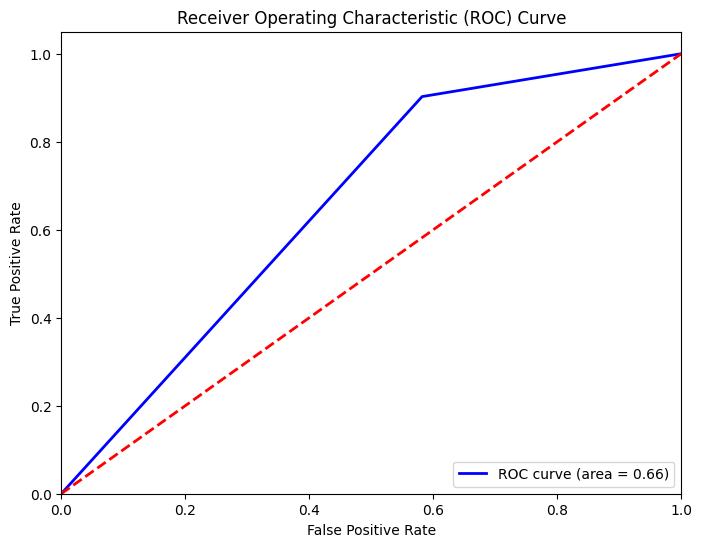

In [102]:
from sklearn.metrics import roc_curve, auc
def plot_roc_auc(y_scores, y_true):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

y_predicted_per, y_predicted_bool = model.predict(X_valid)
y_predicted_bool = np.array(y_predicted_bool)
print("Model Accuracy:",model.validate(y_predicted_bool, y_valid))
print("Model Precision:",model.precision(y_predicted_bool, y_valid))
print("Model Recall:",model.recall(y_predicted_bool, y_valid))
print("Model Specificity:",model.specificity(y_predicted_bool, y_valid))
plot_roc_auc(y_predicted_bool, y_valid)

### Get Model Plot

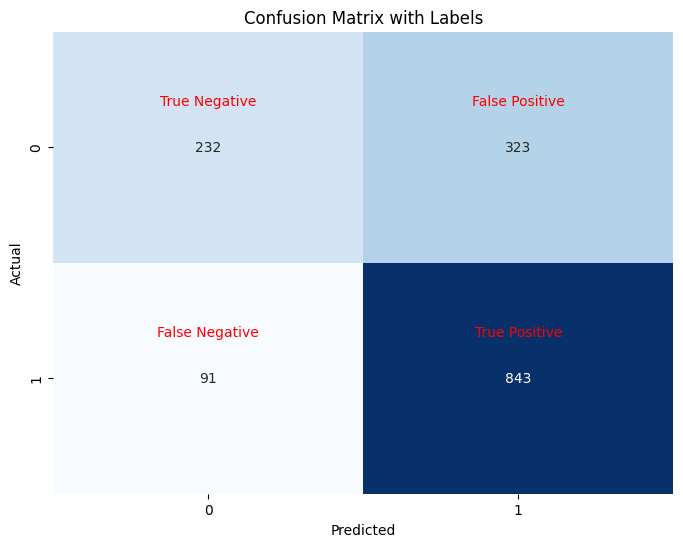

In [103]:
model.plot(y_predicted_bool, y_valid)

### Make the Model have a Higher Precision

0.581981981981982 0.9025695931477516

Model Accuracy: 0.4922766957689725
Model Precision: 0.9158878504672897
Model Recall: 0.20985010706638116
Model Specificity: 0.9675675675675676


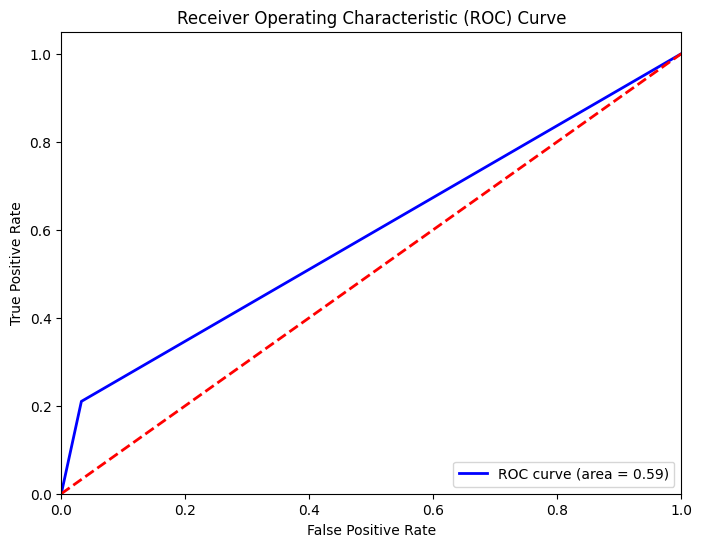

In [104]:
def max_precision_threshold(y_scores, y_true):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    print(fpr[1], tpr[1])

max_precision_threshold(y_predicted_bool, y_valid)
y_predicted_per, y_predicted_bool = model.predict(X_valid, threshold=0.9)
y_predicted_bool = np.array(y_predicted_bool)
print()
print("Model Accuracy:",model.validate(y_predicted_bool, y_valid))
print("Model Precision:",model.precision(y_predicted_bool, y_valid))
print("Model Recall:",model.recall(y_predicted_bool, y_valid))
print("Model Specificity:",model.specificity(y_predicted_bool, y_valid))
plot_roc_auc(y_predicted_bool, y_valid)

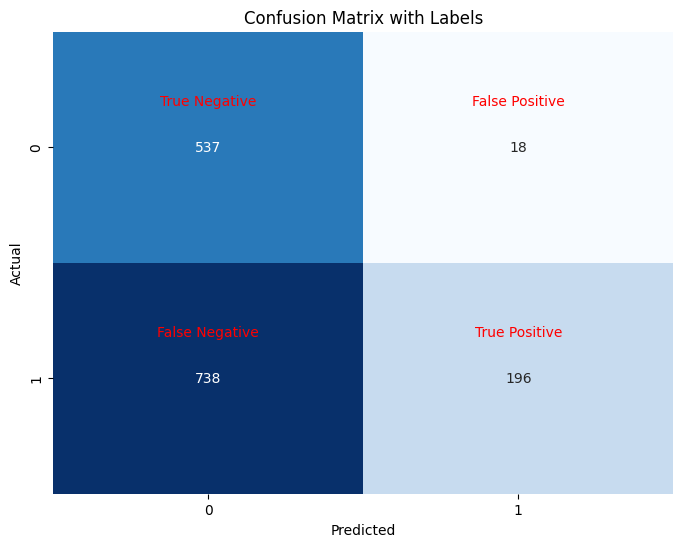

In [105]:
model.plot(y_predicted_bool, y_valid)